# 10. `pandas` and `seaborn`: Statistical Plots

Interpretation of climate data heavily depends on statistical methods, so it is important to learn how to visualize climate statistical information. Although `xarray` can read netCDF files and plot different types of maps, it doesn't have built-in methods to support statistical plots such as box plots, regression line plots, density maps. Therefore, we need to use external libraries to create these plots. Here, we introduce the `seaborn` library. `seaborn` is a powerful tool for statistical data visualization. The plotting method is very simple but highly functional, and the output diagrams are aesthetic. In this unit, we will learn how to plot with `seaborn` after performing calculations with `xarray`.

`seaborn` mainly accepts `.csv` files and `pandas.DataFrame` objects. When passing datasets to `seaborn`, we need to tidy the data into a structure that `seaborn` can identify, namely **long form** and **wide form**. The data structure accepted by `seaborn` can be found in the [`seaborn` tutorial page](https://seaborn.pydata.org/tutorial/data_structure.html). In this unit, we will focus on how to convert a DataArray/Dataset to a long or wide form `pandas.DataFrame` and pass it to `seaborn`. For details of plotting methods and options, see the [`seaborn` official website](https://seaborn.pydata.org/), which we will not cover in detail here.

![Data Structure](https://seaborn.pydata.org/_images/data_structure_19_0.png)

## Data Structure of `pandas`

Like `xarray`, `pandas` handles "labeled-data" (In fact, `xarray` originated from `pandas`!). Depending on the dimensionality of the data, the pandas data structures are divided into two types: **Series** and **DataFrame**.

### Series

A Series is a 1-dimensional, labeled array. It can store multiple types of elements. The "labels" are called **index** in the context of `pandas`. The method to create a new Series is as follows:

~~~python
s = pd.Series(data, index=index)
~~~

A Series can be created by specifying a data series and the label index. Here is a simple example. More detailed usage can be found in the [Pandas tutorial](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe).


In [1]:
import numpy as np 
import pandas as pd 

s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.504058
b   -0.383447
c    0.762964
d    0.747198
e   -1.251098
dtype: float64

### DataFrame

A DataFrame is a 2-dimensional labeled array. It is similar to an Excel sheet. The method to create a new DataFrame is:

~~~python
df = pd.DataFrame(data, index=index, columns=columns)
~~~

**Index** is the label for each row, whereas **columns** is the label for each column.


In [2]:
d = np.random.randn(5,3)
df = pd.DataFrame(d, index=['a','b','c','d','e'], columns=['one','two','three'])
df

,one,two,three
a,0.226752,0.902235,1.184339
b,-0.491408,-0.405491,-1.006732
c,1.275540,-0.611947,0.645992
d,-1.235026,-0.657133,0.291115
e,0.074858,-0.721388,-0.001089


Or we can create a DataFrame using a **dictionary**. The **keys** of the dictionary will be treated as column labels (`bom`, `cma`, `ecmwf`, and `ncep` in the following example).

In [3]:
df = pd.DataFrame(dict(bom=np.random.randn(10),
                       cma=np.random.randn(10),
                       ecmwf=np.random.randn(10),
                       ncep=np.random.randn(10)), 
                  index=range(1998,2008)
                  )
df

,bom,cma,ecmwf,ncep
1998,0.519351,1.072753,0.399883,0.881745
1999,-0.305793,-0.606127,-0.231836,2.330074
2000,0.981117,0.146072,1.015087,-0.463966
2001,-0.156737,-0.123277,0.349035,0.859672
2002,-0.681352,-0.831348,0.581107,0.931555
2003,0.538782,1.439764,-0.431093,-1.270008
2004,-1.032308,-0.632147,-0.002873,0.319924
2005,0.341714,-1.022086,-0.177217,1.345242
2006,0.745793,0.972456,-0.459214,-0.630618
2007,-0.414252,1.664351,-0.856654,-0.356861


## Read `.csv` File with `pandas`

We can read a `.csv` file using `pandas.read_csv()` and convert the file contents to a `pandas.DataFrame`.

**Example 1a:** [Tsai et al. (2021, Atmosphere)](https://www.mdpi.com/2073-4433/12/6/758) defined "Subseasonal Peak Rainfall Events (SPREs)" as a maximum 15-day rainfall period within a season. The SPRE is a useful index to evaluate extreme rainfall prediction capability in forecast models. In Tsai et al. (2021), they found SPREs in the DJF season for each year from 1998 to 2019 and calculated the percentile ranks (PR) of the 15-day accumulative rainfall amount in both observation and model reforecasts. The difference of PRs between observation and models can be quantified by "root-mean-squared errors (RMSE)". The CSV sample file `sns_sample_s2s_pr_rmse.csv` contains the RMSEs of PRs for the SPREs in the BoM and CMA reforecasts in the first 15 days prediction lead time.

In [4]:
import pandas as pd

df = pd.read_csv("data/sns_sample_s2s_pr_rmse.csv")
df.head()

,Models,Lead time (days),Year,PR_RMSE
0,BoM,1.0,1998.0,21.78
1,BoM,1.0,1999.0,36.98
2,BoM,1.0,2000.0,7.25
3,BoM,1.0,2001.0,13.18
4,BoM,1.0,2002.0,19.64


## Plotting Long Form `pandas.DataFrame` with `seaborn`

The above `.csv` file is **long form** data accepted by `seaborn`. Now we can plot the data.

**Example 1b:** Plot the RMSEs of SPRE PRs (abbreviated as `PR_RMSE` in the file) changing with prediction lead time using box plot. The x-axis is prediction lead time, the y-axis is the magnitude of RMSE, and the spread of box is the multi-year distribution of PR_RMSE. 

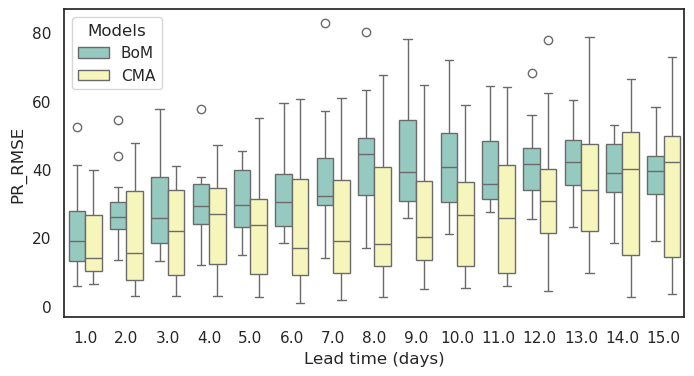

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 100

sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8,4)) 
bxplt = sns.boxplot(data=df,
                    x='Lead time (days)', y='PR_RMSE', 
                    ax=ax,
                    hue='Models',
                    palette="Set3")
ax.set_ylabel("PR_RMSE")
plt.show()

In the following code, we specify the labels of the `x` and `y` axes to `seaborn`. The `hue` parameter is used to add a third dimension to the data visualization by assigning different colors to the categories or values of a specified variable.

We can also use the `col` option to plot on multiple subplots. To do this, we need to use `catplot` instead of `boxplot` because setting the `col` option will plot on a **FacetGrid** instead of on just one subplot.

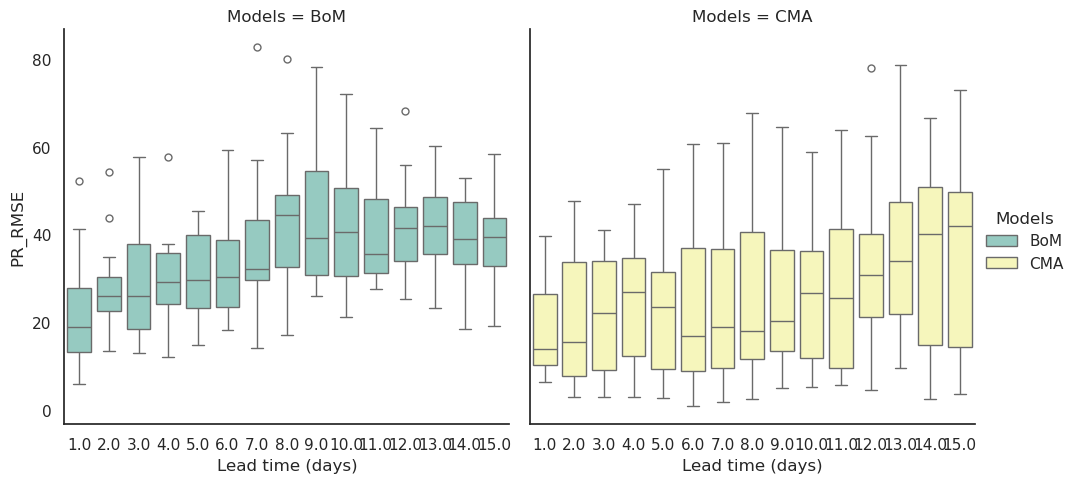

In [6]:
sns.set_theme(style="white", palette=None)
bxplt = sns.catplot(data=df,
                    x='Lead time (days)', y='PR_RMSE', 
                    kind='box', col='Models',
                    hue='Models',
                    palette="Set3")
ax.set_ylabel("PR_RMSE")
plt.show()

## Conversion of `xarray.DataArray` to `pandas.DataFrame`

### `xarray.to_pandas`

The [API reference](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.to_pandas.html) states that the converted pandas data type is determined by the dimensions of the DataArray.

> Convert this array into a pandas object with the same shape.
The type of the returned object depends on the number of DataArray dimensions:  
0D -> `xarray.DataArray`  
1D -> `pandas.Series`  
2D -> `pandas.DataFrame`  
Only works for arrays with 2 or fewer dimensions.



### Example: Scatter Plot and Regression Line

**Example 3:** Plot the scatter plot between the Western Pacific Subtropical High (WPSH) Index and domain-averaged rainfall over the Yangtze River Basin (105.5˚-122˚E, 27˚-33.5˚N) during the MJJ season, and calculate the regression line. The WPSH index is calculated based on 850-hPa zonal wind and is defined as

$$\mathrm{WPSH} = U_{850}\left[ (115˚-140˚\mathrm{E}, 28˚-30˚\mathrm{N})\right] − U_{850}\left[(115˚-140˚\mathrm{E}, 15˚-17˚\mathrm{N})\right]$$

This scatter plot allows us to understand the relationship between the two variables (rainfall and WPSH). The two variables are stored in two DataArrays, and they can be merged into one Dataset. Then we convert the Dataset to a `pandas.DataFrame` so that we can plot with `seaborn`.

**Step 1:** Read and select rainfall and wind data.


In [7]:
import xarray as xr
pcpds = xr.open_dataset('data/cmorph_sample.nc')
pcp = (pcpds.sel(time=slice('1998-01-01','2018-12-31'),
                  lat=slice(27,33.5),
                  lon=slice(105.5,122)).cmorph)
pcp

<xarray.DataArray 'cmorph' (time: 7670, lat: 26, lon: 66)> Size: 53MB
[13161720 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 61kB 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 264B 105.6 105.9 106.1 106.4 ... 121.4 121.6 121.9
  * lat      (lat) float32 104B 27.12 27.38 27.62 27.88 ... 32.88 33.12 33.38
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      precipitation
    units:          mm/day
    ver_note:       1998-2020: V1,0; 2021: V0.x.
    comment:        !!! CMORPH estimate is rainrate !!!

In [8]:
uds = xr.open_mfdataset( 'data/ncep_r2_uv850/u850.*.nc',                                       
                          combine = "nested",               
                          concat_dim='time',                               
                          parallel=True                
                         )
u = uds.sel(time=slice('1998-01-01','2018-12-31'),
            level=850,
            lat=slice(30,15),
            lon=slice(115,140)).uwnd.load()
u

<xarray.DataArray 'uwnd' (time: 7670, lat: 7, lon: 11)> Size: 2MB
array([[[  1.6199951 ,   2.199997  ,   3.7700043 , ...,  10.75      ,
          11.020004  ,  10.369995  ],
        [  2.7700043 ,   3.2200012 ,   4.399994  , ...,  10.520004  ,
           8.569992  ,   5.7700043 ],
        [  4.0200043 ,   4.319992  ,   4.75      , ...,   6.869995  ,
           3.7700043 ,   0.09999084],
        ...,
        [  0.05000305,   0.02999878,   0.02999878, ...,  -2.8600006 ,
          -2.7100067 ,  -3.3600006 ],
        [ -3.380005  ,  -3.2900085 ,  -3.0800018 , ...,  -5.630005  ,
          -4.7599945 ,  -4.630005  ],
        [ -5.2900085 ,  -4.9100037 ,  -4.8099976 , ...,  -6.6100006 ,
          -6.8399963 ,  -7.2299957 ]],

       [[  6.849991  ,   6.6399994 ,   5.5       , ...,   8.169998  ,
           9.75      ,  10.599991  ],
        [  8.669998  ,   7.0899963 ,   5.        , ...,   7.849991  ,
           9.669998  ,  11.099991  ],
        [  6.9900055 ,   5.1900024 ,   3.3399963 , ...,   3.9900055 ,
           4.619995  ,   5.7400055 ],
...
        [-10.199997  , -12.449997  , -12.220001  , ...,  -6.300003  ,
          -4.75      ,  -3.600006  ],
        [-14.470001  , -15.869995  , -14.449997  , ...,  -9.869995  ,
          -8.770004  ,  -8.169998  ],
        [-15.949997  , -17.270004  , -16.350006  , ..., -11.720001  ,
         -11.169998  , -10.869995  ]],

       [[ -0.19999695,   0.02999878,   0.13000488, ...,   2.649994  ,
           2.7799988 ,   3.        ],
        [ -1.3500061 ,  -2.4700012 ,  -3.2200012 , ...,   1.6499939 ,
           1.300003  ,   0.94999695],
        [ -2.869995  ,  -5.220001  ,  -6.669998  , ...,  -1.0700073 ,
          -1.449997  ,  -1.75      ],
        ...,
        [-10.199997  , -11.850006  , -12.        , ...,  -7.650009  ,
          -6.970001  ,  -6.050003  ],
        [-14.070007  , -13.949997  , -12.600006  , ...,  -9.619995  ,
          -9.        ,  -8.150009  ],
        [-16.15001   , -14.350006  , -12.25      , ..., -10.720001  ,
         -10.5       , -10.220001  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 61kB 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 44B 115.0 117.5 120.0 122.5 ... 135.0 137.5 140.0
  * lat      (lat) float32 28B 30.0 27.5 25.0 22.5 20.0 17.5 15.0
    level    float32 4B 850.0
Attributes: (12/14)
    standard_name:         eastward_wind
    long_name:             Daily U-wind on Pressure Levels
    units:                 m/s
    unpacked_valid_range:  [-140.  175.]
    actual_range:          [-78.96 110.35]
    precision:             2
    ...                    ...
    var_desc:              u-wind
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Daily A...
    level_desc:            Pressure Levels
    statistic:             Mean
    parent_stat:           Individual Obs
    cell_methods:          time: mean (of 4 6-hourly values in one day)

**Step 2** Statistical analysis: calculate area mean rainfall and WPSH index, and select the season we need. 

In [9]:
pcpts = (pcp.mean(axis=(1,2))
            .sel(time=~((pcp.time.dt.month == 2) & (pcp.time.dt.day == 29)))
            )
pcp_ptd = pcpts.coarsen(time=5,side='left', coord_func={"time": "min"}).mean()  # 計算pentad mean
pcp_ptd_mjj = pcp_ptd.sel(time=(pcp_ptd.time.dt.month.isin([5,6,7])))
pcp_ptd_mjj

<xarray.DataArray 'cmorph' (time: 399)> Size: 2kB
array([ 4.8970165 ,  7.9518876 ,  6.319289  ,  2.4725406 ,  5.27035   ,
        2.170851  ,  4.783776  ,  3.937529  , 11.973356  , 10.144266  ,
       11.061295  , 13.090139  ,  9.517157  ,  2.0094523 ,  3.4387412 ,
        6.7226806 , 11.502437  , 10.5547905 ,  9.479826  ,  2.9567833 ,
        3.5055594 ,  4.1681933 ,  6.725932  , 11.227705  ,  2.9874592 ,
        2.4019814 ,  4.487879  ,  2.9615617 ,  9.328345  ,  8.361376  ,
       17.8       ,  5.0629954 ,  9.045652  ,  4.8956294 ,  9.328997  ,
        3.7565734 ,  3.8314571 ,  4.111655  ,  0.3021329 ,  3.6132984 ,
        3.5981002 ,  2.3257692 ,  7.2976217 ,  5.5318065 , 13.691736  ,
        7.9762588 ,  4.2428904 ,  3.8893006 , 13.693474  ,  6.9901514 ,
        9.405932  ,  4.689091  ,  6.358776  ,  3.2129135 ,  2.252133  ,
        7.383217  ,  2.8664687 ,  4.964475  ,  4.936305  ,  1.1263635 ,
        2.2311187 ,  2.2804198 ,  4.0579023 ,  8.117238  ,  6.8227034 ,
        5.0488696 ,  8.666551  ,  5.666422  ,  4.5268536 ,  3.3424478 ,
        3.6482053 ,  6.963858  ,  1.558951  ,  3.8080535 ,  2.550478  ,
        5.6249647 ,  9.637308  ,  6.783858  , 12.585258  ,  4.844767  ,
        1.3790094 ,  4.6789045 ,  1.5510608 ,  7.1460257 ,  5.1195927 ,
        7.1560845 , 12.34908   , 12.694429  ,  3.5173545 ,  2.4259324 ,
        0.28142193,  9.145932  , 12.452902  ,  4.6736712 ,  5.1581006 ,
        6.8205705 ,  4.7389283 ,  9.617587  ,  3.4697907 ,  3.9260025 ,
...
        5.9538927 ,  5.01324   ,  0.9436598 ,  4.4753027 ,  6.041911  ,
        6.934068  ,  5.07711   ,  4.8284035 ,  8.588112  ,  1.5448952 ,
       10.228043  ,  1.7740676 ,  1.9260607 ,  7.228357  ,  8.549138  ,
        6.3187065 , 12.640233  ,  1.4202797 , 11.316084  ,  7.279161  ,
        4.142191  ,  3.5260372 ,  2.4751165 ,  4.1878905 ,  7.2561064 ,
       11.466655  ,  4.0412    ,  1.946387  ,  7.6451874 , 10.063392  ,
        6.7887535 ,  6.0969815 , 12.194288  ,  8.405164  , 10.297377  ,
        7.8729143 ,  2.699021  ,  4.153112  ,  5.390607  , 10.084627  ,
        3.1376457 ,  2.0847204 ,  9.51324   , 11.786633  ,  3.1671562 ,
        5.3714223 ,  4.1579022 ,  5.4215965 , 14.319791  ,  3.3686714 ,
        4.624697  , 13.882413  , 12.359255  , 10.334114  , 21.119303  ,
        5.0222025 ,  7.4891496 , 11.105817  ,  0.966352  ,  3.1370628 ,
        6.3480887 ,  4.5376463 ,  4.9669466 ,  7.596236  ,  1.2960141 ,
        4.0143824 ,  0.98304194,  9.380851  ,  8.573579  , 11.14049   ,
        4.2023306 , 13.881643  ,  9.043998  ,  9.088369  ,  9.648952  ,
        4.0862937 ,  3.827599  ,  0.41491842,  1.7904428 ,  4.379033  ,
        6.227797  ,  4.3578324 ,  1.9046853 , 12.030944  ,  7.8016205 ,
        5.260373  ,  2.5838928 ,  3.4374127 ,  2.6103146 ,  6.182331  ,
        4.548438  ,  7.4217596 , 12.894266  ,  7.690734  ,  2.6264687 ,
        0.7665617 ,  2.525     ,  7.5979834 ,  5.8932753 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1998-05-01 1998-05-06 ... 2018-07-30

In [10]:
ushear =  ( u.sel(lat=slice(30,28)).mean(axis=(1,2)) -
            u.sel(lat=slice(17,15)).mean(axis=(1,2)) )
ushear_ts = ushear.sel(time=~((ushear.time.dt.month == 2) & (ushear.time.dt.day == 29)))

us_ptd = ushear_ts.coarsen(time=5,side='left', coord_func={"time": "min"}).mean()  # 計算pentad mean
us_ptd_mjj = us_ptd.sel(time=(us_ptd.time.dt.month.isin([5,6,7])))
us_ptd_mjj

<xarray.DataArray 'uwnd' (time: 399)> Size: 2kB
array([ 1.08629093e+01,  1.14845448e+01,  1.27180004e+01,  7.67090893e+00,
       -9.08927250e+00,  1.62546352e-01,  6.54854584e+00,  3.03854513e+00,
        1.47341814e+01,  1.10549088e+01,  9.51418018e+00,  1.52740021e+01,
        1.17298174e+01,  2.34254599e+00,  2.37345576e+00,  7.63490915e+00,
        4.29800034e+00,  6.97127247e+00,  4.96727324e+00,  2.77472639e+00,
        1.08218277e+00,  4.87781811e+00,  8.18581676e+00,  1.13078175e+01,
        6.89981747e+00, -2.22527266e+00,  3.71763611e+00,  1.82545400e+00,
        1.15070896e+01,  9.05963612e+00,  1.38921814e+01,  3.99600029e+00,
        5.89817762e-01, -4.41818285e+00,  2.03655250e-02, -1.17494535e+01,
       -5.74236393e+00, -1.61383629e+01,  3.51745367e+00, -4.62781763e+00,
        2.14727211e+00, -1.37327230e+00, -1.08218157e+00,  1.28032742e+01,
        1.37232723e+01,  6.91254520e+00,  1.41690862e+00,  4.48781872e+00,
        1.29796352e+01,  1.31552734e+01, -3.22763681e+00, -1.13463602e+01,
        5.61654615e+00, -1.32600141e+00,  3.53109050e+00, -3.57618141e+00,
       -1.29454046e-01,  3.42327356e+00,  6.09636402e+00,  5.71090996e-01,
        3.73472667e+00,  2.64709067e+00,  4.57490826e+00,  8.40818024e+00,
        7.98672724e+00,  3.31927180e+00,  1.02049084e+01,  7.53345490e+00,
        1.54910917e+01,  1.94982028e+00,  8.39455009e-01, -2.55490899e+00,
       -1.37581897e+00, -6.59454703e-01, -4.54090881e+00, -2.80399990e+00,
        7.21654510e+00,  1.01392727e+01,  8.40781975e+00,  2.78236127e+00,
...
       -3.35909081e+00, -2.14472914e+00, -1.34690914e+01,  6.40454388e+00,
        8.35018063e+00,  1.52945461e+01,  5.94981766e+00,  4.46163559e+00,
        6.36672592e+00,  1.17292728e+01,  1.14947262e+01,  1.54529085e+01,
        1.32661800e+01,  7.82145548e+00,  1.52783642e+01,  5.10400009e+00,
       -1.55118198e+01, -1.47272739e+01, -6.11872625e+00,  4.78290796e+00,
        7.42691040e+00,  5.28327274e+00,  1.16412716e+01,  1.51381836e+01,
        8.13599968e+00,  2.07236433e+00, -7.25818276e-01,  7.70108938e+00,
        1.57998517e-01,  2.49309182e+00,  7.68818140e+00,  1.67116356e+01,
        1.72925453e+01,  1.54359989e+01,  1.11898193e+01, -3.40909266e+00,
        1.10725451e+01,  1.00247269e+01,  2.75854492e+00,  1.69309044e+00,
       -3.19054580e+00,  5.67236233e+00,  1.40927277e+01,  1.23472738e+01,
        6.06909454e-01, -4.36436462e+00,  3.72109175e+00,  1.00218236e+00,
        8.18345451e+00,  5.64036417e+00, -1.42000675e-01,  1.12516356e+01,
        1.03294554e+01,  1.05718184e+01,  1.32959995e+01,  8.56436348e+00,
        1.11461811e+01,  1.51509058e+00, -1.21736355e+01, -1.27656345e+01,
        1.33679991e+01,  9.29127407e+00,  8.62581921e+00,  7.17381811e+00,
        5.08327198e+00,  8.33309078e+00,  4.55763721e+00, -1.31781673e+00,
       -6.21254635e+00, -6.81823716e-02,  1.00396366e+01,  5.55800009e+00,
       -1.58636284e+00, -2.48218107e+00, -5.53545380e+00, -1.40667267e+01,
       -1.13407259e+01, -6.04981899e+00, -6.60945368e+00], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1998-05-01 1998-05-06 ... 2018-07-30
    level    float32 4B 850.0

**Step 3:** Convert the DataArrays to long frame DataFrame, and pass to `seaborn` for plotting. To plot scatter plot and regression line, use [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot).  

In [11]:
scatter_df = (xr.merge([pcp_ptd_mjj.rename('pcp'), us_ptd_mjj.rename('ushear')])
                .to_dataframe())
scatter_df

,pcp,level,ushear
time,,,
1998-05-01,4.897017,850.0,10.862909
1998-05-06,7.951888,850.0,11.484545
1998-05-11,6.319289,850.0,12.718000
1998-05-16,2.472541,850.0,7.670909
1998-05-21,5.270350,850.0,-9.089272
...,...,...,...
2018-07-10,2.626469,850.0,-5.535454
2018-07-15,0.766562,850.0,-14.066727
2018-07-20,2.525000,850.0,-11.340726


Text(1.0, 1.0, '$R=$ 0.394, $p=$ 3.07e-16')

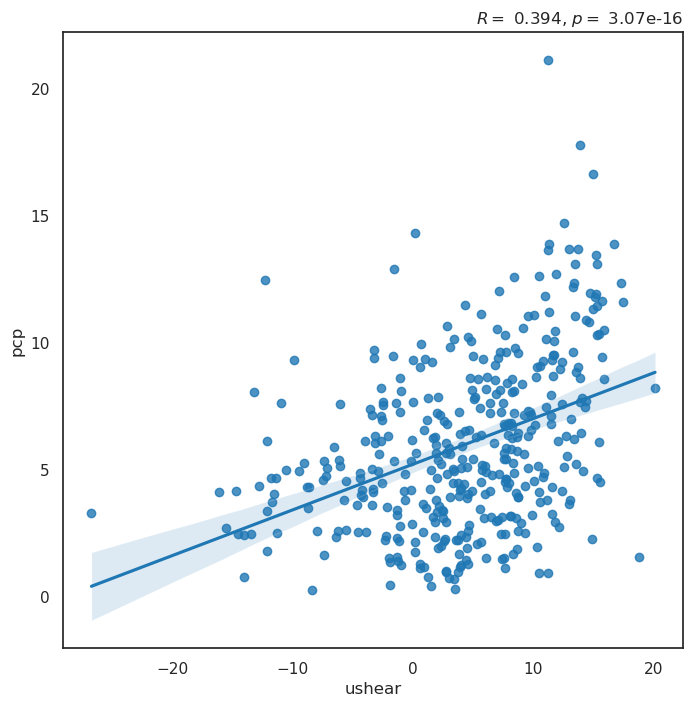

In [12]:
from scipy import stats

def corr(x, y):
    return stats.pearsonr(x, y)[0], stats.pearsonr(x, y)[1]

# 計算相關係數和統計顯著性。
r, p = corr(us_ptd_mjj.values, pcp_ptd_mjj.values)

fig, ax = plt.subplots(figsize=(8,8))
sns.set_theme(style="white", palette=None)
plot = sns.regplot(x="ushear", y="pcp",
                  data=scatter_df,
                  ci=95, ax=ax) # ci是信心水準
ax.set_title(f'$R=$ {r:5.3f}, $p=$ {p:8.2e}', loc='right' )  # Correlation coefficient and p-values

## Plotting Wide Form `pandas.DataFrame` with `seaborn`

**Example 4:** Plot a heat map of pentad mean rainfall percentile ranks (PRs) from April to November in 1998-2020 over the Taiwan-northern South China Sea region (18˚-24˚N, 116˚-126˚E).

In [13]:
lats, latn = 18, 24                  
lon1, lon2 = 116, 126         

pcp = pcpds.sel(time=slice('1998-01-01','2020-12-31'),
                  lat=slice(lats,latn),
                  lon=slice(lon1,lon2)).cmorph

pcp_ptd_ts = (pcp.mean(axis=(1,2))
                 .sel(time=~((pcp.time.dt.month == 2) & (pcp.time.dt.day == 29)))
                 .coarsen(time=5,side='left', coord_func={"time": "min"})
                 .sum())
pcp_season = pcp_ptd_ts.sel(time=(pcp_ptd_ts.time.dt.month.isin([4,5,6,7,8,9,10,11])))


In [14]:
pcp_rank = pcp_season.rank(dim='time',pct=True) * 100.  # Use `DataArray.rank` to rank. `pct=True` can calculate percentiles. 
pcp_rank_da = xr.DataArray(data=pcp_rank.values.reshape(23,49),  # reshape the array to (year, pentad)
                           dims=["year", "pentad"],
                           coords=dict(
                                      year = range(1998,2021,1),
                                      pentad = range(19,68,1),
                                      ),
                           name='precip')
pcp_rank_da

<xarray.DataArray 'precip' (year: 23, pentad: 49)> Size: 9kB
array([[2.40461402e+01, 7.98580302e-01, 7.22271517e+01, ...,
        6.67258208e+01, 8.33185448e+01, 3.62910382e+01],
       [3.99290151e+01, 1.87222715e+01, 6.03371783e+01, ...,
        2.72404614e+01, 1.30434783e+01, 7.00976043e+01],
       [4.31233363e+01, 3.47826087e+01, 4.62289264e+01, ...,
        6.34427684e+01, 4.42768412e+01, 6.29991127e+00],
       ...,
       [8.87311446e-02, 3.44276841e+01, 4.09937888e+01, ...,
        1.56166815e+01, 5.49245785e+01, 3.02573203e+01],
       [4.30346051e+01, 2.66193434e-01, 5.42147294e+01, ...,
        9.13930790e+01, 3.16770186e+01, 1.20674357e+01],
       [4.27684117e+01, 5.04880213e+01, 2.71517303e+01, ...,
        1.48181012e+01, 1.27772848e+01, 4.57852706e+01]])
Coordinates:
  * year     (year) int64 184B 1998 1999 2000 2001 2002 ... 2017 2018 2019 2020
  * pentad   (pentad) int64 392B 19 20 21 22 23 24 25 ... 61 62 63 64 65 66 67

In [15]:
pcp_rank_df = pcp_rank_da.to_pandas()
pcp_rank_df

pentad,19,20,21,22,23,24,25,26,27,28,...,58,59,60,61,62,63,64,65,66,67
year,,,,,,,,,,,,,,,,,,,,,
1998,24.046140,0.798580,72.227152,77.107365,32.475599,68.411713,51.197870,26.086957,45.519077,86.867791,...,94.942325,43.300799,98.225377,15.527950,66.104703,52.440106,20.585626,66.725821,83.318545,36.291038
1999,39.929015,18.722272,60.337178,5.501331,7.897072,81.366460,70.275067,76.220053,55.723159,49.778172,...,85.891748,64.951198,10.559006,24.312334,28.748891,13.487134,12.156167,27.240461,13.043478,70.097604
2000,43.123336,34.782609,46.228926,26.974268,34.605146,58.207631,39.219166,4.081633,70.541260,84.117125,...,69.565217,48.890861,25.554570,96.628217,88.553682,65.838509,65.306122,63.442768,44.276841,6.299911
2001,39.751553,37.267081,37.799468,40.195209,61.579414,22.448980,37.089618,58.385093,92.280390,77.639752,...,55.989352,5.944987,1.863354,26.619343,15.882875,57.409051,66.637090,6.654836,4.170364,2.040816
2002,4.259095,3.637977,21.916593,6.743567,3.992902,4.702751,0.177462,3.460515,33.895297,79.858030,...,11.002662,49.423248,43.212067,49.068323,34.072760,50.399290,17.125111,62.999113,26.796806,25.820763
2003,48.003549,56.255546,20.496894,31.322094,78.615794,7.808341,37.533274,6.122449,11.268855,47.914818,...,44.454303,11.712511,2.750665,61.490683,57.231588,27.861579,64.596273,50.842946,46.140195,8.340728
2004,44.099379,18.367347,21.118012,17.746229,5.678793,8.518190,9.671695,30.434783,19.698314,77.994676,...,15.705413,38.509317,62.910382,1.685892,3.194321,13.753327,19.343390,42.945874,56.965395,28.926353
2005,7.187223,1.419698,26.264419,8.074534,18.988465,11.801242,17.480035,86.956522,61.668146,27.595386,...,13.664596,9.405501,29.281278,56.166815,0.976043,42.502218,50.044366,66.015972,33.007986,50.931677
2006,2.218279,15.350488,46.406389,34.960071,19.254658,49.334516,27.950311,3.105590,69.476486,81.543922,...,5.590062,11.446318,33.984028,87.133984,72.848270,29.547471,35.492458,54.303461,21.827862,33.096717


The above DataFrame is in a wide form table.

In a long form DataFrame, labels are only stored in the index. In contrast, a wide form DataFrame stores labels in both columns and index, allowing for a two-dimensional representation.


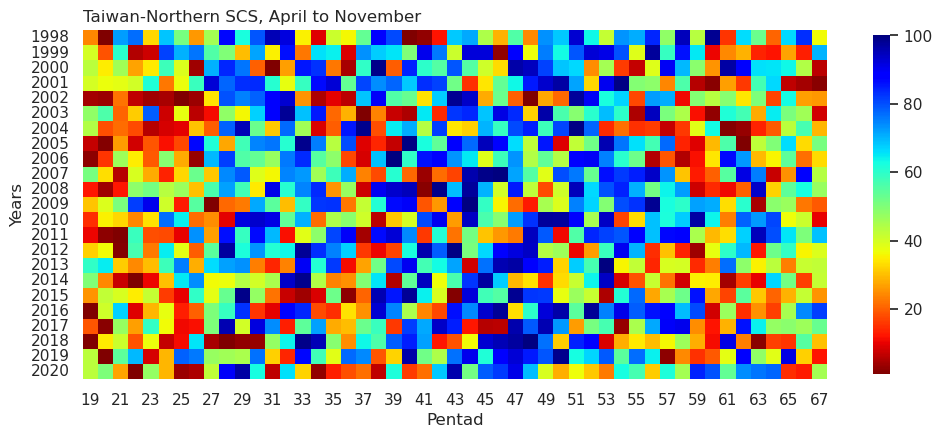

In [16]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
sns.set_theme()
ax = sns.heatmap(pcp_rank_df,
                 cmap='jet_r',
                 square=True,
                 vmin=1,vmax=100,
                 cbar_kws={"shrink": 0.55, 'extend':'neither'},
                 xticklabels=2)
plt.xlabel("Pentad")
plt.ylabel("Years")
ax.set_title("Taiwan-Northern SCS, April to November",loc='left')
plt.savefig("pcp_pr_heatmap_obs_chn.png",orientation='portrait',dpi=300)

## Conversion between Long Form and Wide Form

Use `pandas.DataFrame.unstack`. 


In [17]:
pcp_rank_long = pcp_rank_df.unstack().reset_index(name='PR')
pcp_rank_long

,pentad,year,PR
0,19,1998,24.046140
1,19,1999,39.929015
2,19,2000,43.123336
3,19,2001,39.751553
4,19,2002,4.259095
...,...,...,...
1122,67,2016,81.810115
1123,67,2017,53.149956
1124,67,2018,30.257320
1125,67,2019,12.067436
